# Day 9 - Time Series: Moving Averages & Volatility

## Learning Objectives
- Understand and calculate simple and exponential moving averages (SMA, EMA).
- Measure rolling volatility using historical data.
- Visualize and interpret trends and volatility for risk assessment.

## Key Concepts
- SMA: Simple Moving Average = average of past n prices.
- EMA: Exponential Moving Average = weighted average with more weight to recent prices.
- Volatility: Standard deviation of returns, used as a risk metric.
- Rolling Window: A fixed-size moving window over time series data.

In [1]:
# Step 1: Download stock data
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2025-07-01"

data = yf.download(ticker, start=start_date, end=end_date)
data = data[['Close']]
data.dropna(inplace=True)

data.head()

C:\Users\vedik\AppData\Local\Temp\ipykernel_20368\2171509969.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2022-01-03,178.645630
2022-01-04,176.378357
2022-01-05,171.686707
2022-01-06,168.820679
2022-01-07,168.987534


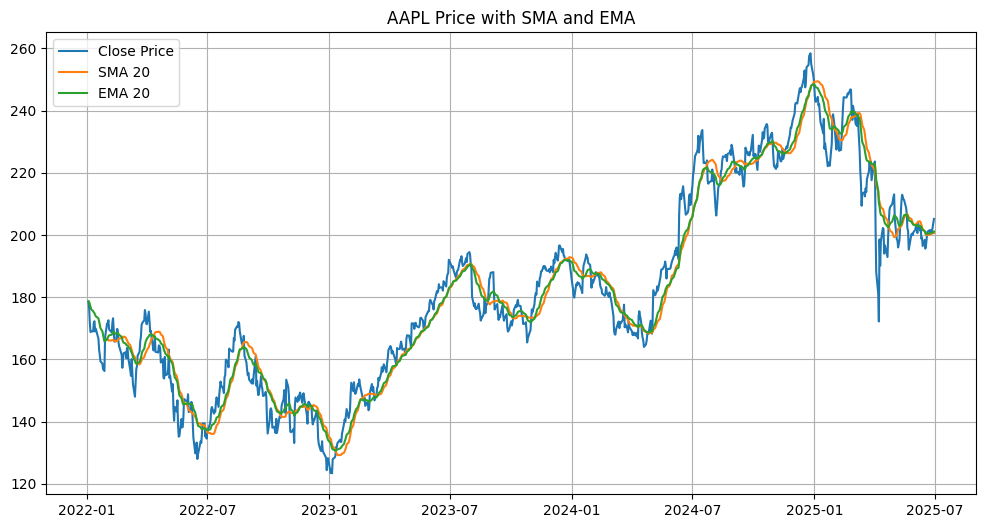

In [2]:
# Step 2: Calculate Moving Averages (SMA and EMA)
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()

# Plot Close with SMA and EMA
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA_20'], label='SMA 20')
plt.plot(data['EMA_20'], label='EMA 20')
plt.title(f"{ticker} Price with SMA and EMA")
plt.legend()
plt.grid(True)
plt.show()

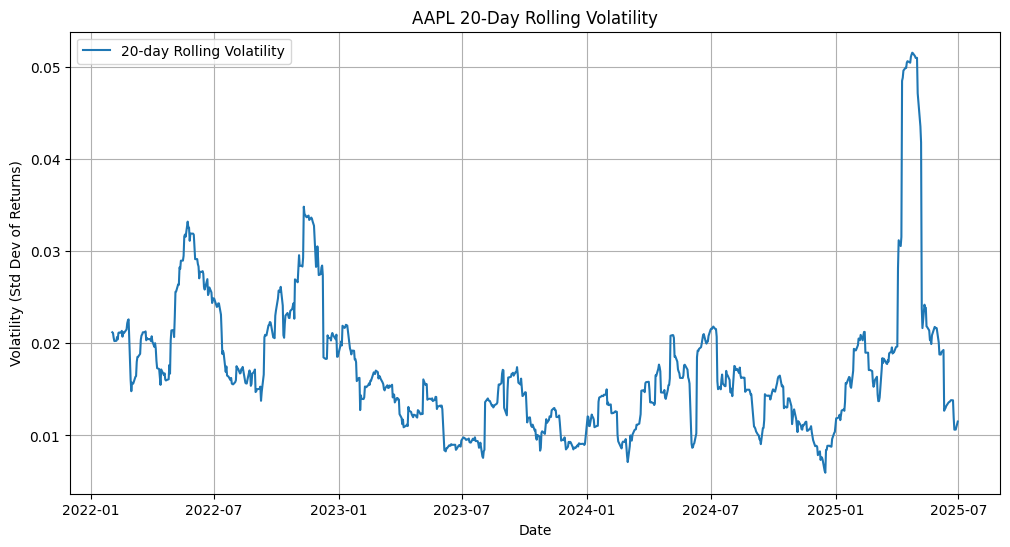

In [3]:
# Step 3: Calculate Rolling Volatility (Standard Deviation)
data['Daily_Return'] = data['Close'].pct_change()
data['Rolling_Std_20'] = data['Daily_Return'].rolling(window=20).std()

# Plot Rolling Volatility
plt.figure(figsize=(12,6))
plt.plot(data['Rolling_Std_20'], label='20-day Rolling Volatility')
plt.title(f"{ticker} 20-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (Std Dev of Returns)")
plt.grid(True)
plt.legend()
plt.show()

In [4]:
# Step 4: Summary Statistics of Volatility
vol_stats = data['Rolling_Std_20'].describe()
print("Rolling Volatility Summary:")
print(vol_stats)

Rolling Volatility Summary:
count    855.000000
mean       0.017133
std        0.007552
min        0.005960
25%        0.012266
50%        0.015660
75%        0.020329
max        0.051535
Name: Rolling_Std_20, dtype: float64
